<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%20%EB%B0%A9%EB%B2%95%EB%A1%A0/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B9%88%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영문 텍스트 분석

[2023 Data Scientists Jobs Descriptions](https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)

## 데이터 수집

In [1]:
import pandas as pd

In [5]:
jobs = pd.read_csv('/content/Jobs.csv')
jobs.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [24]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


## 데이터 전처리

In [10]:
contents = jobs['description']
contents.head()

0    TransUnion's Job Applicant Privacy Notice  Wha...
1    About The Opportunity  We're all about connect...
2    Discover. A brighter future.  With us, you’ll ...
3    Are you a 2023 college graduate or rising coll...
4    JOB DESCRIPTION:  At NORC, Data Scientists pla...
Name: description, dtype: object

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

- stopwords : 자연어 처리 패키지 중 불용어 정보를 제공하는 모듈
- WordNetLemmatizer : 자연어 처리 패키지 중 단어 형태의 일반화를 위해 표제어 추출을 제공하는 모듈

In [20]:
import re
from nltk.tokenize import word_tokenize

words = []

for content in contents:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(content)) # 영어가 아닌 것 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화 -> 단어 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
    words.append(EnWordsTokenStopLemma)

print(words[:10])

[['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment', 'associate', 'driver', 'seat', 'professional', 'development', 'access', 'help', 'along', 'way', 'encourage', 'everyone', 'pursue', 'passion', 'take', 'ownership', 'career', 'support', 'colleague', 'mentor', 'associate', 'given', 'tool', 'needed', 'get', 'want', 'go', 'regardless', 'job', 'title', 'associate', 'opportunity', 'learn', 'new', 'thing', 'leader', 'every', 'day', 'come', 'part', 'team', 'work', 'great', 'people', 'pioneering', 'product', 'cutting', 'edge', 'technology', 'bring', 'familiarity', 'interest', 'data', 'analytics', 'statistical', 'concept', 'marketing', 'mix', 'modeling', 'multi', 'touch', 'attribution', 'modeling', 'multivariate', 'regression', 'time', 'series', 'modeling', 'bayesian', 'statistic', 'segmentation', 'modeling', 'machine', 'learning', 'data', 'mining', 'simulation', 'optimization', 'forecasting', 'roi', 'analysis', 'working', 'knowledge'

- re : 메타 문자를 이용하여 특정 규칙을 작성하는 정규식을 사용하기 위한  모듈
- word_tokenize : 자연어 처리 패키지 중 단어 토큰화 작업을 위한 모듈

In [21]:
from functools import reduce

words2 = list(reduce(lambda x,y : x+y, words))

print(words2[:10])

['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment']


## 데이터 분석 모델 구축

In [25]:
from collections import Counter

count = Counter(words2)
print(count)

Counter({'data': 10139, 'experience': 4266, 'business': 2924, 'work': 2747, 'team': 2505, 'analysis': 2075, 'skill': 1815, 'science': 1579, 'analytics': 1501, 'year': 1497, 'ability': 1448, 'opportunity': 1377, 'support': 1256, 'including': 1231, 'project': 1166, 'information': 1122, 'job': 1105, 'solution': 1097, 'development': 1095, 'model': 1080, 'employee': 1076, 'process': 1074, 'position': 1062, 'tool': 1022, 'management': 1022, 'learning': 1021, 'company': 1007, 'knowledge': 1006, 'related': 996, 'role': 984, 'system': 984, 'requirement': 982, 'product': 981, 'time': 962, 'working': 947, 'u': 943, 'required': 930, 'technology': 902, 'new': 896, 'benefit': 893, 'analyst': 893, 'health': 893, 'program': 881, 'strong': 877, 'customer': 873, 'technical': 872, 'degree': 850, 'report': 841, 'status': 839, 'service': 837, 'develop': 821, 'using': 820, 'need': 790, 'problem': 773, 'client': 756, 'sql': 752, 'research': 739, 'environment': 738, 'provide': 731, 'machine': 726, 'insight': 

In [34]:
word_count = dict()

# 출현 횟수가 많은 상위 50개 단어 중에서 단어의 길이가 1보다 큰 것만 딕셔너리에 저장한다.
for tag, counts in count.most_common(50):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s:%d"%(tag,counts))

data:10139
experience:4266
business:2924
work:2747
team:2505
analysis:2075
skill:1815
science:1579
analytics:1501
year:1497
ability:1448
opportunity:1377
support:1256
including:1231
project:1166
information:1122
job:1105
solution:1097
development:1095
model:1080
employee:1076
process:1074
position:1062
tool:1022
management:1022
learning:1021
company:1007
knowledge:1006
related:996
role:984
system:984
requirement:982
product:981
time:962
working:947
required:930
technology:902
new:896
benefit:893
analyst:893
health:893
program:881
strong:877
customer:873
technical:872
degree:850
report:841
status:839
service:837


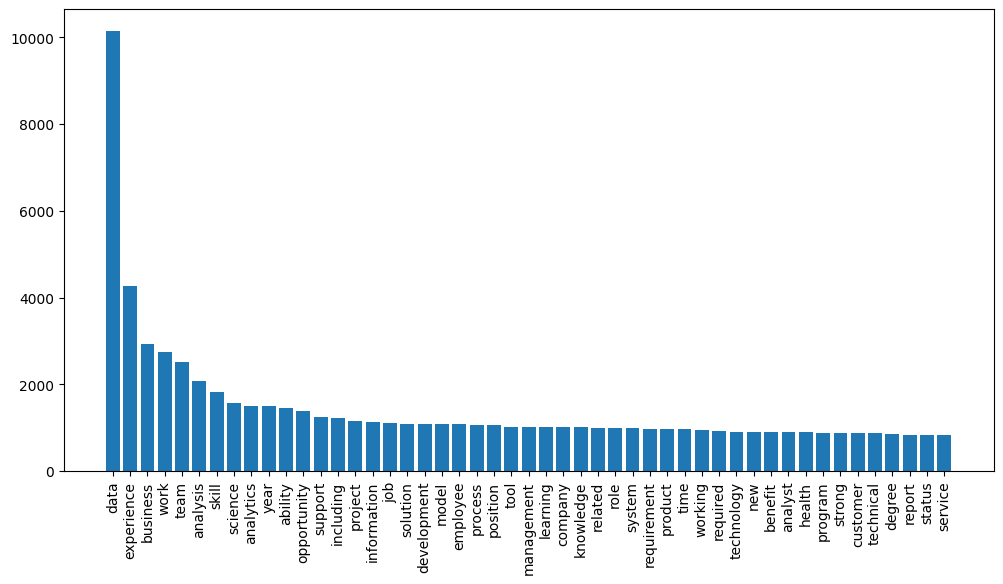

In [28]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True) # x축
sorted_Values = sorted(word_count.values(), reverse = True) # y축

plt.figure(figsize=(12, 6))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical') # x축 눈금
plt.show() # 그래프 출력

In [29]:
# 데이터 수집을 위한 키워드 단어가 가장 많이 조회될 수 있으므로 제거한 후 조회한다.
del word_count['data']
del word_count['science']

## 데이터 시각화

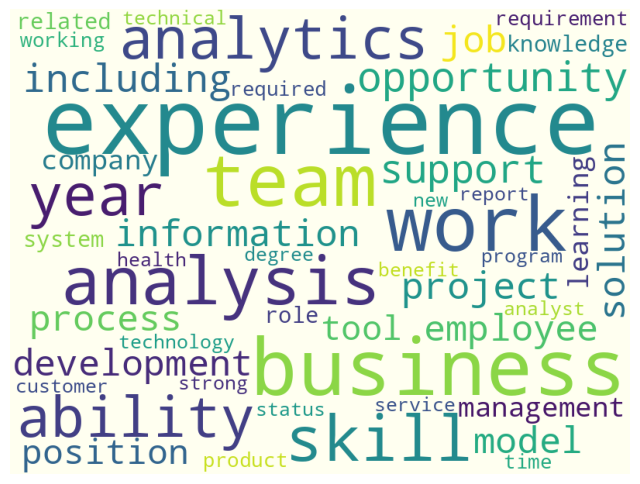

In [30]:
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS) # 불용어 설정
wc = WordCloud(background_color = 'ivory', stopwords=stopwords, width=800, height=600) # 워드클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) # 단어 빈도수
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 워드 클라우드 생성
plt.axis('off')
plt.show()

- STOPWORDS, WordCloud : 워드클라우드를 그리기 위해 사용할 워드클라우드 용 불용어 모듈과 워드클라우드 모듈

# 한글 텍스트 분석

## 데이터 수집

In [72]:
import json

mz_news = json.loads(open('/content/MZ_naver_news.json', 'r', encoding = 'utf-8').read())
# mz_news

In [54]:
mz_news2 = pd.read_json('/content/MZ_naver_news.json')
mz_news2

,title,content
0,"[속보] 尹대통령 ""모든 정책, MZ세대 청년 관점서 볼 필요""",[\n\n\n\n\n연합뉴스 속보연합뉴스 속보(PG) jun@yna.co.kr\n]
1,슈퍼두퍼 홍대에 2호점 연다.. MZ세대 적극 공략,[\n\n\n\n\n [파이낸셜뉴스] ‘슈퍼두퍼’가 다음달 서울 홍대에 글로벌 2...
2,"하윤수 교육감, MZ세대 직원과 소통시간 가져",[\n\n\n\n\n29일 오전 하윤수 부산시교육감이 시교육청 별관 교육감소통공감실...
3,"주69시간제 반대 MZ노조위원장 ""정부에 목소리 뺏길 수 없었다""","[\n[인터뷰] 유준환 새로고침노동자협의회 의장 ""양대노총과 공통점 더 많다""\n\..."
4,"尹 ""모든 정책은 MZ세대 관점서 볼 필요…'답정너'식 곤란""(종합)","[\n기사내용 요약국무회의 등 연일 당정협의 강화 지시""MZ세대는 모든 세대 여론 ..."
...,...,...
76,e스포츠팀 적극 이용 MZ세대에 부산 유치 홍보,[\nKB금융그룹\n\n\n\nKB국민은행은 부산엑스포 유치 홍보를 위해 e스포츠팀...
77,첫 저출산 대책에 MZ “정책 실효성 의문…지원시 소득기준 자체를 없애야”[저출산 ...,[\n정부 저출산 대책 관련 MZ세대 시민들 반응“한국 사회 문화·분위기 근본부터 ...
78,"부산은행, MZ세대 겨냥 '팟 신용카드' 출시","[\n\n\n\n\nBNK부산은행, MZ세대 '팟(pod)신용카드' 출시[부산은행 ..."
79,"MZ세대 공무원 절반 ""임금 별로, 이직 원해요""…1년새 12%P `껑충`",[\n한국행정연구원 6000명 대상 공직생활실태조사‘이직 의사’ 공무원 33.5%서...


In [84]:
import re
content = ''
if 'content' in mz_news.keys():
    content = re.sub(r'[^\w]', ' ', str(mz_news['content']))

content[:1000]

'  0      n n n n n연합뉴스 속보연합뉴스 속보 PG     jun yna co kr n     1      n n n n n  파이낸셜뉴스    슈퍼두퍼 가 다음달 서울 홍대에 글로벌 2호점을 선보인다    29일 bhc그룹에 따르면 슈퍼두퍼  홍대점 이 위치한 홍대 거리는 2030세대 커플이 가장 많이 찾는 곳 중 하나로 내국인뿐만 아니라 외국 관광객도 많이 방문하는 핫플레이스로 슈퍼두퍼의 주요 타깃층과 잘 맞아떨어진 장소다    현재 홍대점은 가림막이 설치돼 새 단장을 위한 공간 조성 작업이 한창이다  전반적인 인테리어 콘셉트는 강남점과 동일하게 오렌지 컬러와 따스한 조명으로 모던하면서도 세련된 디자인으로 활기찬 분위기를 연출해 고객들이 샌프란시스코 현지의 감성을 그대로 느끼며 편안하게 버거를 즐길 수 있도록 조성된다    bhc그룹의 슈퍼두퍼는 미국 서부지역 샌프란시스코를 대표하는 프리미엄 수제버거 브랜드로 지난해 11월  강남점 을 오픈하면서 국내에 최초로 선보였다  오픈 이후 트렌디한 버거의 맛과 다이닝 레스토랑으로서 공간이 주는 매력으로 인해 인스타 핫플로 떠오르면서 오픈 2주일 만에 약 2만 개의 버거 메뉴가 팔렸다    슈퍼두퍼는 강남점에 이어 홍대점이 MZ 세대들에게 인기 있는 특별한 공간으로 자리매김될 수 있도록 버거와 다이닝이 접목한 슈퍼푸드만의 슬로우 푸드의 가치를 담아낸 문화공간으로 운영해 나갈 예정이다    bhc그룹 관계자는  슈퍼두퍼는 다른 어떤 버거에서도 경험한 적이 없는 육즙 가득한 패티가 소비자들에게 좋은 평가를 받고 있다 라며  앞으로도 슈퍼두퍼만의 쥬이시한 맛과 더 나은 서비스로 MZ 세대를 적극 공략해 국내 수제버거를 이끄는 톱 브랜드로 성장해 나갈 수 있도록 노력할 것 이라고 밝혔다  n t t     2      n n n n n29일 오전 하윤수 부산시교육감이 시교육청 별관 교육감소통공감실에서 열린   교육감  MZ세대와 청렴한 데이   행사에서 발언을 하고 있다 부산시교육청 제공  부산 뉴스1  박채

In [67]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.5 MB/s eta 0:00:00


In [85]:
from konlpy.tag import Okt

nlp = Okt()
content_N = nlp.nouns(content)

print(content_N)

['연합뉴스', '속보', '연합뉴스', '속보', '파이낸셜뉴스', '슈퍼', '다음', '달', '서울', '홍대', '글로벌', '호점', '그룹', '슈퍼', '홍대', '점', '이', '위치', '홍대', '거리', '세대', '커플', '가장', '곳', '중', '하나로', '국', '뿐', '외국', '관광객', '방문', '핫', '레이스', '슈퍼', '주요', '타깃', '층', '장소', '현재', '홍대', '점', '가림', '막', '설치', '새', '단장', '위', '공간', '조성', '작업', '한창', '전반', '인테리어', '콘셉트', '강남', '점', '오렌지', '컬러', '조명', '모던', '디자인', '분위기', '연출', '고객', '샌프란시스코', '현지', '감성', '그대로', '버거', '수', '조성', '그룹', '슈퍼', '미국', '부지역', '샌프란시스코', '대표', '프리미엄', '수제', '버거', '브랜드', '지난해', '강남', '점', '오픈', '국내', '최초', '오픈', '이후', '트렌디', '버거', '맛', '다이닝', '레스토랑', '공간', '매력', '인스타', '핫', '플로', '오픈', '주일', '약', '개', '버거', '메뉴', '슈퍼', '강남', '점', '홍대', '점', '세대', '인기', '공간', '김', '수', '버거', '다이닝', '접목', '슈퍼', '푸드', '슬로우', '푸드', '가치', '화공', '운영', '예정', '그룹', '관계자', '슈퍼', '다른', '버거', '경험', '적', '육즙', '패티', '소비자', '평가', '라며', '앞', '슈퍼', '쥬이시', '맛', '더', '나은', '서비스', '세대', '적극', '공략', '국내', '버거', '톱', '브랜드', '수', '노력', '것', '오전', '하윤', '수', '부산시', '교육감', '교육청', '별관', '교육감', '소통',

- Okt : 한글 품사 태깅을 위한 모듈

In [87]:
from collections import Counter

count = Counter(content_N)
print(count)

Counter({'세대': 315, '것': 309, '수': 242, '등': 209, '고': 180, '이': 165, '대표': 149, '청년': 134, '정부': 133, '말': 120, '정책': 117, '국민': 117, '회': 114, '노조': 114, '한국': 105, '공무원': 103, '더': 101, '협의': 98, '힘': 97, '주': 92, '대한': 91, '서울': 89, '대통령': 85, '며': 83, '대해': 78, '위': 77, '김': 77, '그': 77, '명': 74, '노동자': 74, '새로고침': 73, '근로시간': 73, '기자': 72, '층': 69, '제공': 68, '최근': 68, '생각': 64, '통해': 63, '학생': 63, '지지율': 60, '조직': 59, '지난': 58, '일': 57, '브랜드': 56, '를': 56, '직원': 55, '지원': 55, '전': 54, '확대': 54, '날': 53, '문화': 53, '위해': 53, '목소리': 53, '노동': 53, '당': 52, '때문': 52, '고객': 51, '소통': 51, '위원': 51, '사업': 51, '개': 49, '발언': 49, '또': 49, '사실': 49, '최고': 49, '채널': 49, '서비스': 48, '윤석열': 48, '개편안': 48, '안': 48, '김기현': 48, '로': 47, '문제': 47, '관광': 47, '아침밥': 47, '제': 46, '중': 45, '사회': 44, '세': 44, '관련': 44, '내': 44, '근로': 43, '때': 43, '우리': 42, '정치': 42, '경우': 42, '및': 42, '주문': 42, '결과': 41, '시간': 41, '상황': 41, '윤': 41, '콘텐츠': 41, '영': 41, '라며': 40, '제도': 40, '진행': 40, '식사': 40, '의견': 39, '

In [88]:
word_count = dict()

for tag, counts in count.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" %(tag,counts))

세대 : 315
대표 : 149
청년 : 134
정부 : 133
정책 : 117
국민 : 117
노조 : 114
한국 : 105
공무원 : 103
협의 : 98
대한 : 91
서울 : 89
대통령 : 85
대해 : 78
노동자 : 74
새로고침 : 73
근로시간 : 73
기자 : 72
제공 : 68
최근 : 68
생각 : 64
통해 : 63
학생 : 63
지지율 : 60
조직 : 59
지난 : 58
브랜드 : 56
직원 : 55
지원 : 55
확대 : 54
문화 : 53
위해 : 53
목소리 : 53
노동 : 53
때문 : 52
고객 : 51
소통 : 51
위원 : 51
사업 : 51
발언 : 49
사실 : 49
최고 : 49
채널 : 49
서비스 : 48
윤석열 : 48
개편안 : 48
김기현 : 48
문제 : 47
관광 : 47
아침밥 : 47
사회 : 44
관련 : 44


In [ ]:
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [90]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

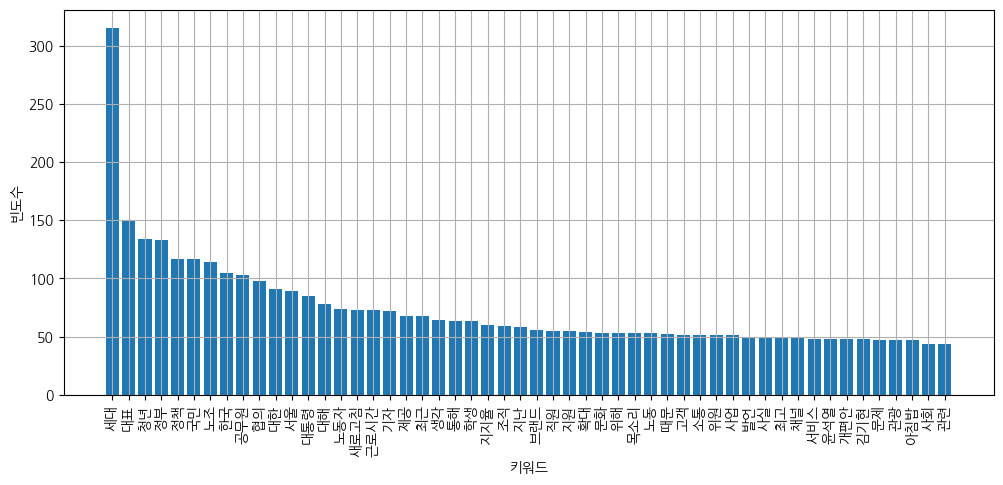

In [93]:
plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')
plt.show()

In [94]:
# 데이터 수집을 위한 키워드 단어가 가장 많이 조회될 수 있으므로 제거한 후 조회한다.
del word_count['세대']

## 데이터 시각화

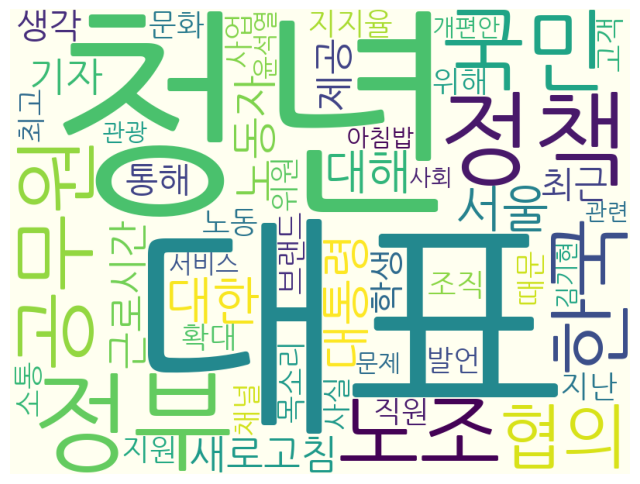

In [95]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path, background_color = 'ivory', width=800, height=600) # 워드클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) # 단어 빈도수
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 워드 클라우드 생성
plt.axis('off')
plt.show()

# 실습 - 커피템플 리뷰 데이터

In [97]:
coffee = pd.read_excel('/content/review_20230725_091330.xlsx')
coffee.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,상품번호,상품명,리뷰구분,구매자평점,포토/영상,리뷰상세내용,리뷰도움수,등록자,리뷰등록일,최종수정일,...,답글등록일시,베스트리뷰,베스트리뷰선정일시,이벤트번호,혜택지급,혜택지급일시,신고여부,신고일시,상품주문번호,풀필먼트사
0,8194608691,[대용량/원두커피] 싱글오리진 에티오피아 예가체프 첼베사 / 500g / 커피템플,일반,5,https://phinf.pstatic.net/checkout.phinf/20230...,항상 만족합니다. 맛있어요,NaN,hp****,2023.07.24. 21:51:55,NaN,...,NaN,N,NaN,NaN,NaN,NaN,N,NaN,2023071770600621,NaN
1,8378279956,[드립백커피] 드립백커피 샘플러 / 10gx4ea / 커피템플,일반,5,NaN,선물하기딱좋을 패키지라 구매햇으요^^^,NaN,arum****,2023.07.22. 20:19:16,NaN,...,NaN,N,NaN,NaN,NaN,NaN,N,NaN,2023072017835031,NaN
2,5569133532,[대용량 / 원두커피] 클래식 블렌딩 / 500g / 커피템플,일반,5,NaN,재구매햇어요 단맛이 많이돌고 고소합니당ㅎㅎ,NaN,arum****,2023.07.22. 20:18:39,NaN,...,NaN,N,NaN,NaN,NaN,NaN,N,NaN,2023072017835001,NaN
3,5351764329,[원두커피]클래식 블렌딩 / 200g / 커피템플,한달사용,5,https://phinf.pstatic.net/checkout.phinf/20230...,쥬시함이 어색하네요 선미가 돌면서 많이 쥬시한데 단맛이 강함은 모르겠어요. 잘먹었어요,NaN,syak******,2023.07.21. 15:04:30,NaN,...,NaN,N,NaN,NaN,NaN,NaN,N,NaN,2023052343829741,NaN
4,5576934474,[대용량 / 원두커피] 클래식 블렌딩 / 1kg / 커피템플,일반,5,NaN,빨리와서 좋아요 맛이 기대되네요,NaN,qkdd******,2023.07.21. 11:34:12,NaN,...,NaN,N,NaN,NaN,NaN,NaN,N,NaN,2023071513210181,NaN


In [128]:
review = coffee['리뷰상세내용']
review = ' '.join(review)
review

"항상 만족합니다. 맛있어요 선물하기딱좋을 패키지라 구매햇으요^^^ 재구매햇어요 단맛이 많이돌고 고소합니당ㅎㅎ 쥬시함이 어색하네요 선미가 돌면서 많이 쥬시한데 단맛이 강함은 모르겠어요. 잘먹었어요 빨리와서 좋아요 맛이 기대되네요 드립백 쥬시도 너무 맛있어요.. 서비스로 받아 먹다 한통 구매했어요 박스 뜯자마자 커피 향이 너무 좋더라고요.\n맛도 정말 좋아요! 믿고 먹는 커피템플! 맛있어요~ 향이 풍부해요 잘 먹고 있습니다~ 맛있고 가격도 저렴해서 더 좋았습니다. 너무 맛있어서 코피 터질뻔 했습니다. 오전에 시키니 하루만에 배송! 화사한 향과 클란한 마무리, 제주에서 먹고 계속 구매합니다~ 친언니가 구매한 원두 먹어보고 구매했네요\n맛나요~~ 최고의맛이에요\n아아로도 좋고 라떼도 넘  맛나요 선물받아서 먹어보고 생각나서 주문했어요 저는 따듯하게보다 아이스로 마시는게 더 풍미가 있는 것 같네요! 괜찮아요 개인적으로는 쥬시가\n더 취향이지만 대중적으로는 클래식\n같아요 맛있습니다. 취향에 맞으니 한동안 계속 주문할꺼같네요. 에스프레소랑 아이스 아메리카노로 너무 잘 먹었어요. 다음에 또 주문 받으실 때 꼭 다시 먹을거에요 쥬시랑 클래식 같이 주문해봤어요~ 멀리서도 먹을 수 있어서 너무 좋아요 잘 받았습니다~^^ 커피전문가 추천글보고 구입했는데\n정말 맛있네요!!\n진짜 카페에서 내려먹는 맛이예요!!\n너무 시지않고 산미도 적당해요! 클래식 커피를 내려먹어 봤어요.\n쓰거나 신맛없이 부드러운 맛이고 딱 먹기 좋아요. 매일마시는커피 넘맛있어용 믿고 먹는 커피템플 원두 ㅠㅠ 믿고 먹는 커피템플 원두 계속 구매해 먹고 있어요.. 앞으로도 쭉~^^ 배송 빨리 왔어요 잘 마셔보겠습니당\n서바스로 다카페인도 하나 주심 너무 죠음?? 제주도의 맛을 잊지못해 에디오피아 주문하려했는데 대용량 일시품절이라 다른거주문 아직 시음전이나 맛있을걸로 믿어요 제주템플에서 먹었던 탠저린라떼가 너무 맛있어서 캡슐커피를 주문했는데 네스프레소. 리스트레토 추출단계에서 걸려서 두개나 버렸어요.ㅡ 커피가 

In [129]:
import re

content = re.sub(r'[^\w]', ' ', str(review))
content = content.strip()
content

'항상 만족합니다  맛있어요 선물하기딱좋을 패키지라 구매햇으요    재구매햇어요 단맛이 많이돌고 고소합니당ㅎㅎ 쥬시함이 어색하네요 선미가 돌면서 많이 쥬시한데 단맛이 강함은 모르겠어요  잘먹었어요 빨리와서 좋아요 맛이 기대되네요 드립백 쥬시도 너무 맛있어요   서비스로 받아 먹다 한통 구매했어요 박스 뜯자마자 커피 향이 너무 좋더라고요  맛도 정말 좋아요  믿고 먹는 커피템플  맛있어요  향이 풍부해요 잘 먹고 있습니다  맛있고 가격도 저렴해서 더 좋았습니다  너무 맛있어서 코피 터질뻔 했습니다  오전에 시키니 하루만에 배송  화사한 향과 클란한 마무리  제주에서 먹고 계속 구매합니다  친언니가 구매한 원두 먹어보고 구매했네요 맛나요   최고의맛이에요 아아로도 좋고 라떼도 넘  맛나요 선물받아서 먹어보고 생각나서 주문했어요 저는 따듯하게보다 아이스로 마시는게 더 풍미가 있는 것 같네요  괜찮아요 개인적으로는 쥬시가 더 취향이지만 대중적으로는 클래식 같아요 맛있습니다  취향에 맞으니 한동안 계속 주문할꺼같네요  에스프레소랑 아이스 아메리카노로 너무 잘 먹었어요  다음에 또 주문 받으실 때 꼭 다시 먹을거에요 쥬시랑 클래식 같이 주문해봤어요  멀리서도 먹을 수 있어서 너무 좋아요 잘 받았습니다    커피전문가 추천글보고 구입했는데 정말 맛있네요   진짜 카페에서 내려먹는 맛이예요   너무 시지않고 산미도 적당해요  클래식 커피를 내려먹어 봤어요  쓰거나 신맛없이 부드러운 맛이고 딱 먹기 좋아요  매일마시는커피 넘맛있어용 믿고 먹는 커피템플 원두 ㅠㅠ 믿고 먹는 커피템플 원두 계속 구매해 먹고 있어요   앞으로도 쭉    배송 빨리 왔어요 잘 마셔보겠습니당 서바스로 다카페인도 하나 주심 너무 죠음   제주도의 맛을 잊지못해 에디오피아 주문하려했는데 대용량 일시품절이라 다른거주문 아직 시음전이나 맛있을걸로 믿어요 제주템플에서 먹었던 탠저린라떼가 너무 맛있어서 캡슐커피를 주문했는데 네스프레소  리스트레토 추출단계에서 걸려서 두개나 버렸어요 ㅡ 커피가 좀 굳어 있으면 잘

In [130]:
from konlpy.tag import Okt

nlp = Okt()
content_N = nlp.nouns(content)

print(content_N)

['항상', '선물', '패키지', '햇', '요', '햇', '단맛', '돌', '쥬시함', '선미', '쥬', '시한', '데', '단맛', '맛', '기대', '드립', '쥬시', '서비스', '통', '구매', '박스', '커피', '향', '맛', '정말', '커피', '템플', '향', '가격', '더', '코피', '뻔', '오전', '하루', '배송', '향', '마무리', '제주', '계속', '구매', '친언니', '구매', '원두', '보고', '구매', '맛', '요', '최고', '맛', '아아', '도', '라떼', '맛', '요', '선물', '보고', '주문', '저', '아이스', '더', '미가', '것', '개인', '쥬시', '더', '취향', '대중', '클래식', '취향', '계속', '주문', '에스프레소', '아이스', '아메리카노', '다음', '또', '주문', '때', '꼭', '다시', '쥬시', '클래식', '주문', '멀리', '서도', '수', '커피전문가', '추천', '글', '보고', '구입', '정말', '진짜', '카페', '맛', '시지', '산미', '클래식', '커피', '신맛', '맛', '먹기', '매일', '커피', '커피', '템플', '원두', '커피', '템플', '원두', '계속', '구매', '앞', '쭉', '배송', '습', '바스', '카페인', '하나', '주심', '음', '제주도', '맛', '에디오피아', '주문', '용량', '품절', '주문', '음', '이나', '로', '템플', '탠', '라떼', '캡슐', '커피', '주문', '네스프레소', '리스트', '레토', '추출', '단계', '개', '커피', '좀', '추출', '에러', '던데', '다른', '캡슐', '추출', '드립', '캡슐', '주문', '드립', '캡슐', '주문', '갓', '때', '사고', '맛', '서재', '주문', '클린', '컵', '산미', '단맛', '의', '스타

In [131]:
from collections import Counter

count = Counter(content_N)
print(count)

Counter({'커피': 258, '맛': 184, '원두': 123, '주문': 108, '향': 97, '구매': 94, '템플': 77, '드립': 62, '배송': 54, '제주도': 54, '산미': 48, '최고': 47, '캡슐': 47, '때': 40, '선물': 39, '더': 38, '또': 38, '디카': 38, '쥬시': 37, '페인': 37, '정말': 33, '수': 32, '것': 29, '제주': 28, '항상': 27, '구입': 26, '포도': 25, '늘': 25, '보고': 22, '계속': 21, '역시': 21, '제': 21, '클래식': 20, '추천': 20, '아주': 20, '카페': 19, '이번': 18, '처음': 18, '매장': 18, '진짜': 17, '자주': 16, '집': 16, '저': 15, '에스프레소': 15, '포장': 15, '조금': 15, '요': 14, '생각': 14, '최애': 14, '정도': 14, '택배': 14, '기대': 13, '라떼': 13, '아이스': 13, '다른': 13, '용': 13, '제품': 13, '하나': 12, '개': 12, '바리스타': 12, '기분': 12, '서비스': 11, '재': 11, '백도': 11, '다시': 10, '바로': 10, '거': 10, '박스': 9, '가격': 9, '미가': 9, '굿': 9, '로스팅': 9, '여기': 9, '게바': 9, '단맛': 8, '다음': 8, '꼭': 8, '네스프레소': 8, '추출': 8, '도착': 8, '느낌': 8, '중': 8, '못': 8, '입맛': 8, '사서': 8, '이벤트': 8, '종류': 8, '후': 8, '온라인': 8, '만족': 8, '말': 8, '방문': 8, '좀': 7, '스타일': 7, '샘플러': 7, '곳': 7, '그람': 7, '지인': 7, '분': 7, '볼': 7, '블렌드': 7, '팩': 7, '마음': 7, '강

In [132]:
word_count = dict()

for tag, counts in count.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" %(tag,counts))

커피 : 258
원두 : 123
주문 : 108
구매 : 94
템플 : 77
드립 : 62
배송 : 54
제주도 : 54
산미 : 48
최고 : 47
캡슐 : 47
선물 : 39
디카 : 38
쥬시 : 37
페인 : 37
정말 : 33
제주 : 28
항상 : 27
구입 : 26
포도 : 25
보고 : 22
계속 : 21
역시 : 21
클래식 : 20
추천 : 20
아주 : 20
카페 : 19
이번 : 18
처음 : 18
매장 : 18
진짜 : 17
자주 : 16
에스프레소 : 15
포장 : 15
조금 : 15
생각 : 14
최애 : 14
정도 : 14
택배 : 14
기대 : 13
라떼 : 13
아이스 : 13
다른 : 13
제품 : 13
하나 : 12
바리스타 : 12
기분 : 12
서비스 : 11
백도 : 11
다시 : 10
바로 : 10
박스 : 9
가격 : 9
미가 : 9
로스팅 : 9
여기 : 9
게바 : 9
단맛 : 8
다음 : 8
네스프레소 : 8
추출 : 8
도착 : 8


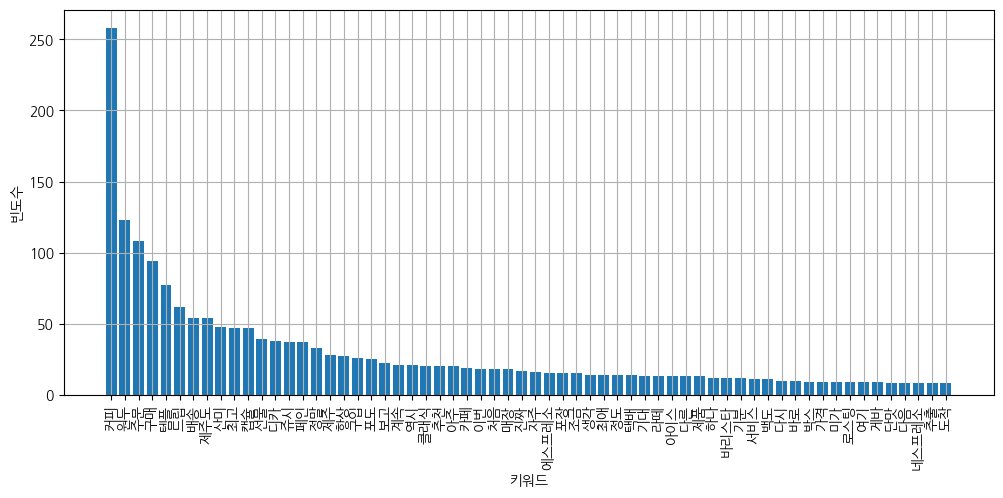

In [133]:
plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')
plt.show()

In [134]:
del word_count['커피']
del word_count['제주도']
del word_count['템플']

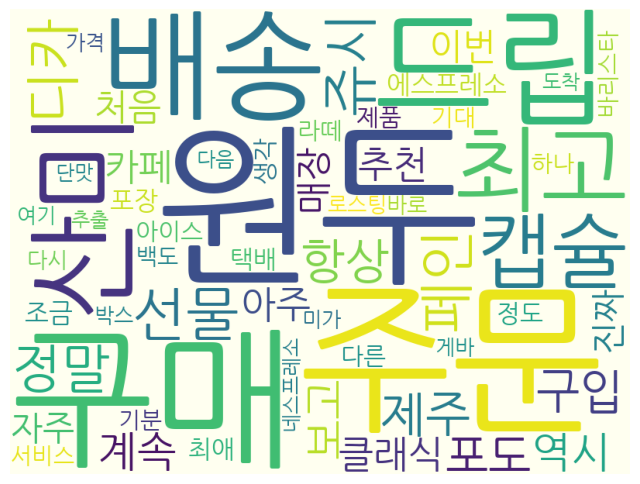

In [135]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path, background_color = 'ivory', width=800, height=600) # 워드클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) # 단어 빈도수
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 워드 클라우드 생성
plt.axis('off')
plt.show()